# Лабораторная работа №2
# Вариант 7 (Набор данных: Mushrooms; Классификаторы: 2, 3)


## ФИО студента: Скрынский Дмитрий
## Группа: 17-ВМ

### Задачи:

1.	Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).
2.	Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции;
3.	Оцените сбалансированность данных по классам (постройте гистограмму). Используйте полученную информацию при выборе метрики оценки качества классификации (PR или ROC кривая)
4.	Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию);
5.	Выполните замену категориальных признаков; выберите и обоснуйте способ замены;
6.	Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других (удалять признаки нужно только для линейных методов классификации);
7.	Заполните пропущенные значения в данных;
8.	Решите поставленную задачу классификации в соответствии с заданием. При подборе параметров классификатора используйте метод GridSearchCV и перекрёстную проверку (изучите возможные для изменения параметры классификации). Определите схему построения многоклассового классификатора, используемую по умолчанию (опишите используемую схему кодирования, обоснуйте свой выбор). Постройте, если это возможно, многоклассовую классификацию на основе схем «один-против-всех» и «все-против-всех». Оцените точность классификации для каждой их схем. Постройте кривые PR и ROC (для каждого из классов должны быть построены отдельные кривые, а также кривые для микро и макроусреднения метрик качества). Для линейного классификатора используйте регуляризацию. 
9.	Сравните кривые для классификаторов, указанных в задании, сделайте выводы.

## Начало работы

In [158]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import warnings
warnings.simplefilter('ignore')

from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, precision_recall_curve, average_precision_score, roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC


%matplotlib inline
mushrooms = pd.read_csv('mushrooms.csv')

### 1. Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).

In [159]:
mushrooms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


1. *cap-shap* - __Форма шляпки__
0. *cap-surface* - __Поверхность шляпки__
0. *cap-color* - __Цвет шляпки__
0. *bruises* - __Пятна__
0. *odor* - __Запах__
0. *gill-attachment* - __Форма пластинок (ламел)__
0. *gill-spacing* -__Расстояние между пластинками__
0. *gill-size* - __Размер пластинок__
0. *gill-color* - __Цвет пластинок__
0. *stalk-shape* - __Форма ножки__
0. *stalk-root* - __Корень__
0. *stalk-surface-above-ring* - __Форма ножки выше юбки__
0. *stalk-surface-below-ring* - __Форма ножки ниже юбки__
0. *stalk-color-above-ring* - __Цвет ножки выше юбки__
0. *stalk-color-below-ring* - __Цвет ножки ниже юбки__
0. *veil-type* - __Форма юбки__
0. *veil-color* - __Цвет юбки__
0. *ring-number* - __Количество колец__
0. *ring-type* - __Тип кольца__
0. *spore-print-color* - __Цвет спор__
0. *population* - __Популяция__
0. *habitat* - __Среда обитания__

### 2. Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции.

In [160]:
print("Размер набора данных до удаления дубликатов: %d" % len(mushrooms))
mushrooms.drop_duplicates(keep="first", inplace=True)
print("Размер набора данных после удаления дубликатов: %d" % len(mushrooms))

Размер набора данных до удаления дубликатов: 8124
Размер набора данных после удаления дубликатов: 8124


### 3. Оцените сбалансированность данных по классам (постройте гистограмму). Используйте полученную информацию при выборе метрики оценки качества классификации (PR или ROC кривая)

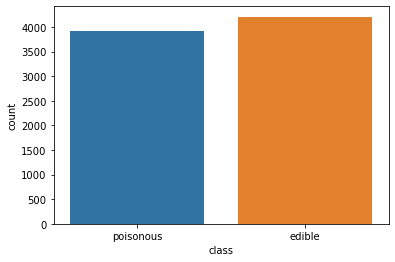

In [161]:
sns.barplot(data=pd.DataFrame({
    'count': [
        len(mushrooms.loc[mushrooms["class"] == 'p']),
        len(mushrooms.loc[mushrooms["class"] == 'e']),
    ],
    'class': [
        'poisonous',
        'edible',
    ],
}), y='count', x='class')

*Вывод*: Поскольку объем данных классов отличается незначительно, будем считать,что сами классы сбалансированы. 

### 4. Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию).

Поскольку в данном наборе данных нет количественных признаков, производить масштабирование не требуется.

### 5. Выполните замену категориальных признаков; выберите и обоснуйте способ замены.

In [162]:


label_encoder = LabelEncoder() 

for column in list(mushrooms):
    mushrooms[column] = pd.Series(label_encoder.fit_transform(mushrooms[column]))
mushrooms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


Был выбран кодировщик *LabelEncoder*, который используeтся для преобразования категориальных или текстовых данных в числа, что как раз подходит для нашего случая.

### 6. Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других (удалять признаки нужно только для линейных методов классификации).

Так как *veil-type* не изменяется, можно его удалить из таблица данных.

In [163]:
mushrooms = mushrooms.drop(columns='veil-type')
mushrooms.nunique()

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

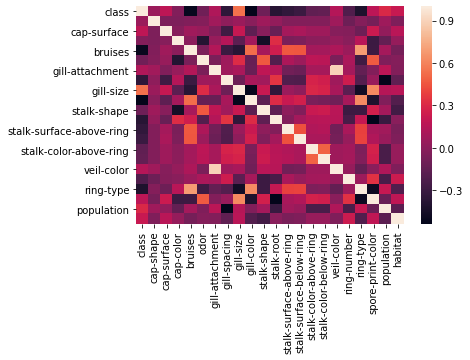

In [164]:
table_corr = mushrooms.corr()
sns.heatmap(table_corr)

### 7. Заполните пропущенные значения в данных.

In [165]:
mushrooms.count()

class                       8124
cap-shape                   8124
cap-surface                 8124
cap-color                   8124
bruises                     8124
odor                        8124
gill-attachment             8124
gill-spacing                8124
gill-size                   8124
gill-color                  8124
stalk-shape                 8124
stalk-root                  8124
stalk-surface-above-ring    8124
stalk-surface-below-ring    8124
stalk-color-above-ring      8124
stalk-color-below-ring      8124
veil-color                  8124
ring-number                 8124
ring-type                   8124
spore-print-color           8124
population                  8124
habitat                     8124
dtype: int64

Пропуски отсуствуют.

### 8. Решите поставленную задачу классификации в соответствии с заданием. При подборе параметров классификатора используйте метод GridSearchCV и перекрёстную проверку (изучите возможные для изменения параметры классификации). Определите схему построения многоклассового классификатора, используемую по умолчанию (опишите используемую схему кодирования, обоснуйте свой выбор). Постройте, если это возможно, многоклассовую классификацию на основе схем «один-против-всех» и «все-против-всех». Оцените точность классификации для каждой их схем. Постройте кривые PR и ROC (для каждого из классов должны быть построены отдельные кривые, а также кривые для микро и макроусреднения метрик качества). Для линейного классификатора используйте регуляризацию.

In [166]:
X_data, Y_data = mushrooms.drop(columns="class", axis=1).values, mushrooms["class"].values
X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=.3)

*__Классификатор K ближайших соседей (задаётся радиус для выбора ближайших объектов)__*

In [167]:
clf = OneVsRestClassifier(LinearSVC(random_state=0))
y_score = clf.fit(X_train, y_train).decision_function(X_test)

radnc = RadiusNeighborsClassifier()

radnc.get_params()
params = {'radius': np.linspace(3, 5, 50),
          'weights': ['uniform', 'distance']}

In [168]:

radnc_grid = GridSearchCV(radnc, params)
radnc_grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RadiusNeighborsClassifier(algorithm='auto', leaf_size=30,
                                                 metric='minkowski',
                                                 metric_params=None,
                                                 n_jobs=None,
                                                 outlier_label=None, p=2,
                                                 radius=1.0,
                                                 weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'radius': array([3.        , 3.04081633, 3.08163265, 3.12244898, 3.16326531,
       3.20408163, 3.24489796, 3.28571429, 3.32653...
       4.02040816, 4.06122449, 4.10204082, 4.14285714, 4.18367347,
       4.2244898 , 4.26530612, 4.30612245, 4.34693878, 4.3877551 ,
       4.42857143, 4.46938776, 4.51020408, 4.55102041, 4.59183673,
       4.63265306, 4.67346939, 4.71428571, 4.75510204, 4.79591837,
       4

In [169]:
rad = radnc_grid.best_estimator_.radius_neighbors

radnc = RadiusNeighborsClassifier(3)
radnc.fit(X_train, y_train)

y_score = radnc.predict(X_test)

print('Accuracy of radnc: %.7f'%(accuracy_score(y_test, y_score)))
print('Best: %.7f'%(radnc_grid.best_score_))

Accuracy of radnc: 0.9950779
Best: 0.9975378


*__Линейный классификатор (Персептрон)__*

In [170]:
ppn = Perceptron()
ppn_params = {'alpha': np.linspace(0, 1, 20),
              'max_iter': [x for x in range(1, 50)]}
print(ppn_params)

{'alpha': array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ]), 'max_iter': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]}


In [171]:
ppn_grid = GridSearchCV(estimator=ppn, 
                        param_grid=ppn_params) 
ppn_grid.fit(X_train, y_train)


alpha = ppn_grid.best_estimator_.alpha
max_iter = ppn_grid.best_estimator_.max_iter

ppn = Perceptron(alpha = alpha, 
                 max_iter = max_iter)
ppn.fit(X_train, y_train)
y_score = ppn.predict(X_test)

print('Accuracy of ppn: %.7f'%(accuracy_score(y_test, y_score)))
print('Best: %.7f'%(ppn_grid.best_score_))

Accuracy of ppn: 0.9187859
Best: 0.9263084


In [172]:
prob_ppn = CalibratedClassifierCV(ppn).fit(X_train, y_train).predict_proba(X_test)
prob_radnc = radnc.predict_proba(X_test)

In [173]:
class plots():
    def addRoc(self, prob, name, test):
        
        tpr, fpr, thresholds = roc_curve(test, prob[:, 0])
        roc_auc  = auc(fpr, tpr)
        plt.plot(fpr, tpr, label='%s ROC curve (area,op(0) = %f)' % (name, roc_auc))
        tpr1, fpr1, thresholds = roc_curve(test, prob[:, 1])
        roc_auc1  = auc(fpr1, tpr1)
        plt.plot(fpr1, tpr1, label='%s ROC curve (area,op(1) = %f)' % (name, roc_auc))
        
    def addPr(self, prob, occupancy, name, test):
       
        precision, recall, _ = precision_recall_curve(test, prob[:, occupancy])
        aps = average_precision_score(test, prob[:, occupancy])
        plt.plot(recall, precision, label='%s PR (area, = %f)' % (name, aps))
        




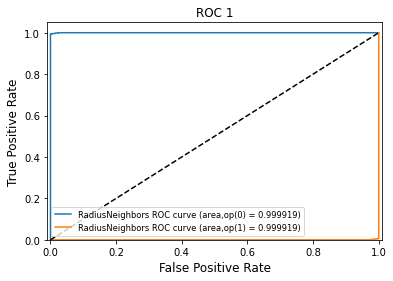

In [174]:
radnc_roc = plots()
radnc_pr = plots()
ppn_pr = plots()
ppn_roc = plots()
radnc_roc.addRoc(prob_radnc, 'RadiusNeighbors', y_test)


plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.01, 1.01])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize='large')
plt.ylabel('True Positive Rate', fontsize='large')
plt.legend(loc=3, fontsize='small')
plt.title('ROC 1' )
plt.show()

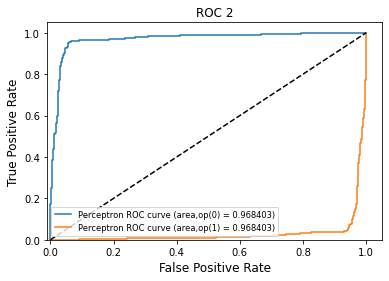

In [175]:
radnc_roc.addRoc(prob_ppn, 'Perceptron', y_test)


plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.01, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize='large')
plt.ylabel('True Positive Rate', fontsize='large')
plt.legend(loc=3, fontsize='small')
plt.title('ROC 2')
plt.show()

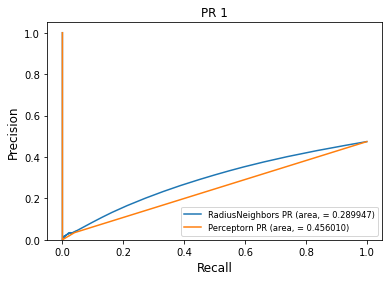

In [176]:
radnc_roc.addPr(prob_ppn, 0, 'RadiusNeighbors', y_test)
radnc_roc.addPr(prob_radnc, 0, 'Perceptorn', y_test)



plt.xlim([-0.05, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall', fontsize='large')
plt.ylabel('Precision', fontsize='large')
plt.legend(loc=4, fontsize='small')
plt.title('PR 1')
plt.show()

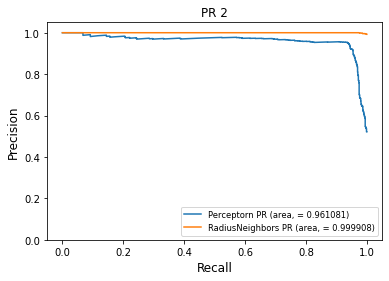

In [177]:

radnc_roc.addPr(prob_ppn, 1, 'Perceptorn', y_test)
radnc_roc.addPr(prob_radnc, 1, 'RadiusNeighbors', y_test)



plt.xlim([-0.05, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall', fontsize='large')
plt.ylabel('Precision', fontsize='large')
plt.legend(loc=4, fontsize='small')
plt.title('PR 2')
plt.show()

 ### 9. Сравните кривые для классификаторов, указанных в задании, сделайте выводы.

Исходя из данных *PR* и *ROC* кривых, оба классификатора (*Персептрон* и *k ближайших соседей(радиус)*) показали примерно одинаковые результаты качества и правильно решают задачу предсказания класса с вероятностью 0.96~0.99. Но классификатор *k ближайших соседей(радиус)* оказался точнее.